# Model of the temperature sensor

In [7]:
## Normal imports
import pandas as pd
import yaml
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import re
import os
import sys
import scipy.constants as const


k_q = const.k/const.e
T0 = 273.15
sys.path.append(".")

#- Get the latest simulation model
from sim.LELO_TEMP.tran import calcTemperatureFromFreq 

#- Get the model for calculating the frequency from the temperature
from model import calcFreq


In [ ]:
#-CTAT voltage
dvd_dT = k_q*(- 3*np.log(T0 + 25))
print(dvd_dT*1e3)

-0.0014729426907408856


Plot the model versus expectation

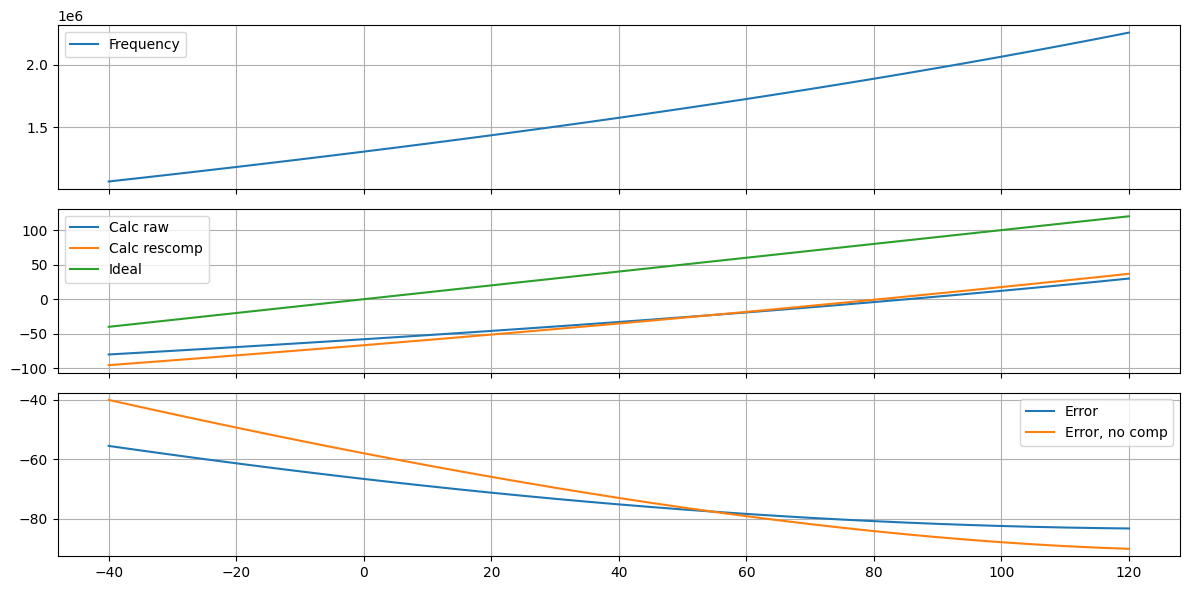

In [5]:
x = np.arange(-40,125,5)

fname = "sim/LELO_TEMP/output_tran/tran_SchGtKttTtVt.yaml"
havesim = False
if(os.path.exists(fname)):
    havesim = True
    with open(fname) as fi:
        obj  = yaml.safe_load(fi)

    temp = obj["temperature"]
    freqsim = obj["freq"]


fig,ax = plt.subplots(3,1,figsize=(12,6),sharex=True)
#ax = [ax]
freq = calcFreq(x)

ax[0].plot(x,freq,label="Frequency")
y1 = calcTemperatureFromFreq(freq)
ax[1].plot(x,y1,label="Calc raw")
y = calcTemperatureFromFreq(freq,compensate=True)
ax[1].plot(x,y,label="Calc rescomp")
ax[1].plot(x,x,label="Ideal")
ax[2].plot(x,y-x,label="Error")
ax[2].plot(x,y1-x,label="Error, no comp")
if(havesim):
    ax[0].plot(temp,freqsim,label="Simulated Frequency")

for a in ax:
    a.grid()
    a.legend()

plt.tight_layout()
